In [1]:
# ==============================================
# COMMON IMPORTS (Run this cell first)
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import os
import zipfile
import requests
import io

# Set random seeds for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)


/Users/aditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow Version: 2.19.0
Keras Version: 3.9.2



--- Assignment 8: Time Series Forecasting (LSTM) ---
Generating sine wave data...


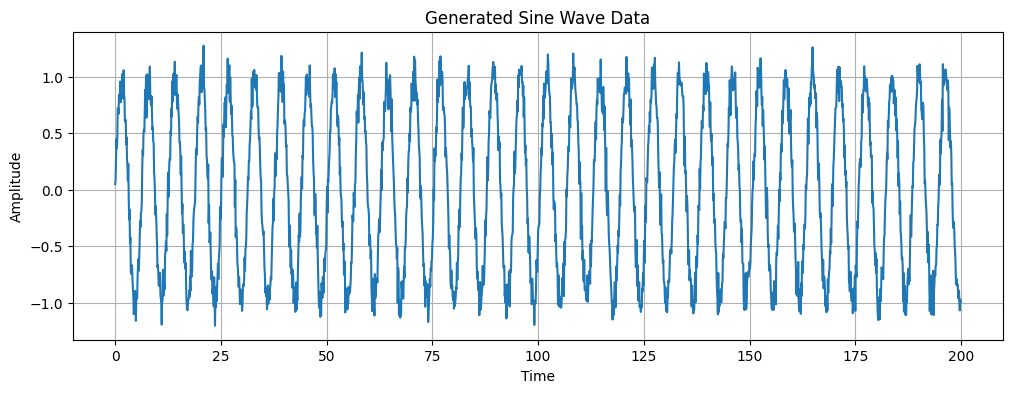

Normalizing data...
X_ts shape: (1980, 20, 1)
y_ts shape: (1980,)
Training samples: 1584
Testing samples: 396
Building LSTM model for forecasting...


/Users/aditya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "time_series_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Compiling LSTM model...
Training LSTM model...
Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1304 - val_loss: 0.0281
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0192 - val_loss: 0.0030
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 12/20
45/

ValueError: could not broadcast input array from shape (396,1) into shape (376,1)

In [2]:
# ==============================================
# Assignment 8: Time Series Forecasting (LSTM on Sine Wave)
# ==============================================
print("\n--- Assignment 8: Time Series Forecasting (LSTM) ---")

# --- 1. Prepare the Time Series Data (Sine Wave Example) ---
print("Generating sine wave data...")
time = np.arange(0, 200, 0.1)
amplitude = np.sin(time) + np.random.normal(scale=0.1, size=len(time)) # Add some noise

# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(time, amplitude)
plt.title("Generated Sine Wave Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# --- 2. Normalize the Data ---
print("Normalizing data...")
scaler_ts = MinMaxScaler(feature_range=(0, 1))
amplitude_scaled = scaler_ts.fit_transform(amplitude.reshape(-1, 1))

# --- 3. Create Sequences for Supervised Learning ---
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 20 # Use previous 20 points to predict the next one
X_ts, y_ts = create_sequences(amplitude_scaled, sequence_length)

# Reshape X for LSTM input [samples, time steps, features]
X_ts = np.reshape(X_ts, (X_ts.shape[0], X_ts.shape[1], 1))

print(f"X_ts shape: {X_ts.shape}") # (num_sequences, sequence_length, 1)
print(f"y_ts shape: {y_ts.shape}") # (num_sequences,)

# --- 4. Split into Training and Testing Sets ---
train_size = int(len(X_ts) * 0.8)
test_size = len(X_ts) - train_size
X_train_ts, X_test_ts = X_ts[0:train_size,:], X_ts[train_size:len(X_ts),:]
y_train_ts, y_test_ts = y_ts[0:train_size], y_ts[train_size:len(y_ts)]

print(f"Training samples: {len(X_train_ts)}")
print(f"Testing samples: {len(X_test_ts)}")

# --- 5. Build the RNN Model (LSTM) ---
print("Building LSTM model for forecasting...")
model_ts_lstm = keras.Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    layers.Dropout(0.2),
    layers.LSTM(50, return_sequences=False), # Only last output needed for next prediction
    layers.Dropout(0.2),
    layers.Dense(25, activation='relu'),
    layers.Dense(1) # Output layer: predict the next single value
], name="time_series_lstm")

model_ts_lstm.summary()

# --- 6. Compile the Model ---
print("Compiling LSTM model...")
# Use Mean Squared Error for regression tasks
model_ts_lstm.compile(optimizer='adam', loss='mean_squared_error')

# --- 7. Train the Model ---
print("Training LSTM model...")
epochs_ts = 20 # Might need more epochs
batch_size_ts = 32
history_ts_lstm = model_ts_lstm.fit(X_train_ts, y_train_ts,
                                    epochs=epochs_ts,
                                    batch_size=batch_size_ts,
                                    validation_split=0.1,
                                    verbose=1)

# --- 8. Evaluate the Model & Predict ---
print("Evaluating LSTM model and predicting...")
train_predict = model_ts_lstm.predict(X_train_ts)
test_predict = model_ts_lstm.predict(X_test_ts)

# Inverse transform predictions to original scale
train_predict = scaler_ts.inverse_transform(train_predict)
test_predict = scaler_ts.inverse_transform(test_predict)
y_train_ts_orig = scaler_ts.inverse_transform(y_train_ts.reshape(-1, 1))
y_test_ts_orig = scaler_ts.inverse_transform(y_test_ts.reshape(-1, 1))

# Calculate RMSE (Root Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train_ts_orig, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_ts_orig, test_predict))
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# --- 9. Visualize Results ---
print("Visualizing predictions...")

# Shift train predictions for plotting
train_predict_plot = np.empty_like(amplitude_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[sequence_length:len(train_predict)+sequence_length, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(amplitude_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(sequence_length*2):len(amplitude_scaled), :] = test_predict # Adjust index carefully

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(scaler_ts.inverse_transform(amplitude_scaled), label='Original Data')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')
plt.title('Assignment 8: Sine Wave Forecast vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss History
plt.figure(figsize=(8, 4))
plt.plot(history_ts_lstm.history['loss'], label='Train Loss')
plt.plot(history_ts_lstm.history['val_loss'], label='Validation Loss')
plt.title('Assignment 8: LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()